In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from simpledbf import Dbf5
from datetime import datetime
import os
import geopandas as gp
import shapely
import fiona
import folium as fol
from IPython.display import Image
%matplotlib inline
dbf = Dbf5('NPWS_Estate.dbf')
df = dbf.to_dataframe()
shp_file_name = "tenure_npws_estate/NPWS_Estate.shp"
parks = gp.geopandas.read_file(shp_file_name)
lga = gp.geopandas.read_file("NOV21_NSW_LGA_POLYGON_shp/nsw_lga.shp")


PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


# New South Wales National Parks and Wildlife Services Estates
## By Alexander Xu

In [3]:
list(dbf.columns)

['OBJECTID',
 'NAME',
 'NAME_SHORT',
 'TYPE',
 'IUCN',
 'RES_NO',
 'GAZ_DATE',
 'VERDATE']

<AxesSubplot:>

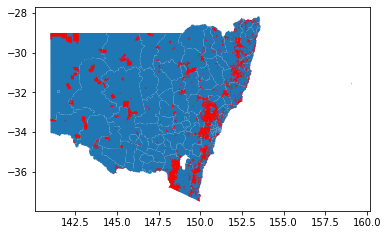

In [18]:
fig, ax = plt.subplots(1,1)
lga.plot(ax = ax)
parks.plot(ax = ax, color = "red")

<AxesSubplot:>

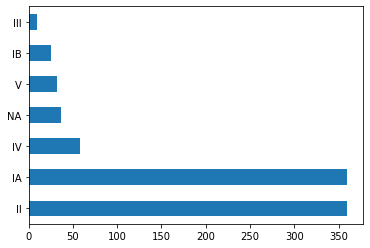

In [4]:
df["IUCN"].value_counts().plot(kind = "barh")

IUCN Category Meanings: 

Ia = Strict Nature Reserve

    Strictly protected for biodiversity and also possibly geological/ geomorphological features, where human visitation, use and impacts are controlled and limited to ensure protection of the conservation values

Ib = Wilderness Area

    Usually large unmodified or slightly modified areas, retaining their natural character and influence, without permanent or significant human habitation, protected and managed to preserve their natural condition

II = National Park

    Large natural or near-natural areas protecting large-scale ecological processes with characteristic species and ecosystems, which also have environmentally and culturally compatible spiritual, scientific, educational, recreational and visitor opportunities

III = Natural Monument or Feature

    Areas set aside to protect a specific natural monument, which can be a landform, sea mount, marine cavern, geological feature such as a cave, or a living feature such as an ancient grove



IV = Habitat/Species Management Area

    Areas to protect particular species or habitats, where management reflects this priority. Many will need regular, active interventions to meet the needs of particular species or habitats, but this is not a requirement of the category

V = Protected Landscape/Seascape

    Where the interaction of people and nature over time has produced a distinct character with significant ecological, biological, cultural and scenic value: and where safeguarding the integrity of this interaction is vital to protecting and sustaining the area and its associated nature conservation and other values

VI = Protected area with sustainable use of natural resources

    Areas which conserve ecosystems, together with associated cultural values and traditional natural resource management systems. Generally large, mainly in a natural condition, with a proportion under sustainable natural resource management and where low-level non-industrial natural resource use compatible with nature conservation is seen as one of the main aims


NR = (Not Reported) - For protected areas where an IUCN category is unknown and/or the data provider has not provided any related information.

NA = (Not Applicable) - Denotes an area that does not meet the NRS criteria or the IUCN definition of a protected area but has management complimentary to the NRS.

NAS = (Not Assigned) - The protected area meets the standard definition of protected areas but the data provider has chosen not to use the IUCN Protected Area Management Categories.

NATURE RESERVE  

NATIONAL PARK

STATE CONSERVATION AREA

REGIONAL PARK

ABORIGINAL AREA

HISTORIC SITE

KARST CONSERVATION RESERVE

C:\Users\yello\AppData\Local\Temp\ipykernel_29948\1652696629.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks[karst_geos].centroid.plot(ax = ax, color = "orange")


<AxesSubplot:>

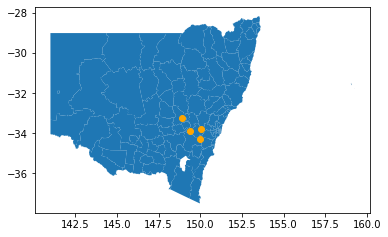

In [6]:
fig, ax = plt.subplots(1,1)
lga.to_crs(epsg = 4326, inplace = True)
lga.plot(ax = ax)
karst_geos = parks["TYPE"].astype(str) == "KARST CONSERVATION RESERVE"
parks.to_crs(epsg = 4326)
parks[karst_geos].centroid.plot(ax = ax, color = "orange")

In [ ]:
type_of_national_park = df["TYPE"]
list_of_karst_parks = []
names_of_karst_parks = []
count = 0
for x in type_of_national_park:
    count += 1
    #print(str(x) + ": " + str(count))
    if str(x) == "KARST CONSERVATION RESERVE":
        list_of_karst_parks.append(count)
        names_of_karst_parks.append(df.iloc[count-1]["NAME"])

for num in list_of_karst_parks:
    print(df.iloc[num-1])
print(list_of_karst_parks)
print(names_of_karst_parks)

OBJECTID                                           2
NAME          Abercrombie Karst Conservation Reserve
NAME_SHORT                           Abercrombie KCR
TYPE                      KARST CONSERVATION RESERVE
IUCN                                             III
RES_NO                                         N0350
GAZ_DATE                                  1997-12-08
VERDATE                                   2022-03-31
Name: 1, dtype: object
OBJECTID                                      105
NAME          Borenore Karst Conservation Reserve
NAME_SHORT                           Borenore KCR
TYPE                   KARST CONSERVATION RESERVE
IUCN                                          III
RES_NO                                      N0353
GAZ_DATE                               1997-12-08
VERDATE                                2022-03-31
Name: 104, dtype: object
OBJECTID                                     381
NAME          Jenolan Karst Conservation Reserve
NAME_SHORT                    

Text(0.5, 0, 'Amount')

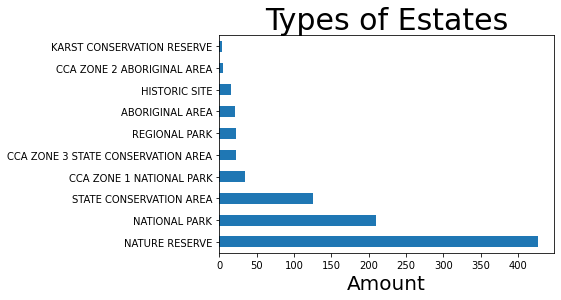

In [17]:
df["TYPE"].value_counts().plot(kind = "barh")
plt.title("Types of Estates", fontsize = 30)
plt.xlabel("Amount", fontsize = 20)


Kart Conservation reserves are all the protected caves within NSW. It's kinda crazy how there's only 4 protected caves in all of NSW. Might explore this revelation. However, Aboriginal Areas are pretty abysmal too, with a total of 26 protected areas, with only 5 of them. CCAs are places that are de-facto controlled by the community. Nature Reserves differ to National Parks as the primary reason for a NR is for research, while NPs are used for recreation to the general public,although nature reserves still allow visitors, its just not as encouraged.

In [4]:
Image(url="caves.PNG")

Text(0, 0.5, 'Parks Created')

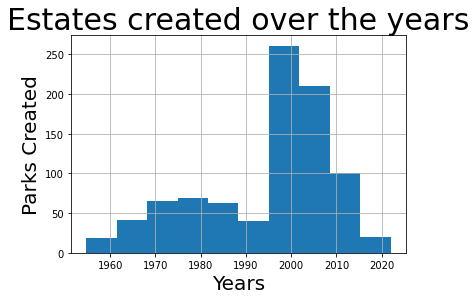

In [21]:
df["GAZ_DATE"].hist()
plt.title("Estates created over the years", fontsize = 30)
plt.xlabel("Years", fontsize = 20)
plt.ylabel("Parks Created", fontsize = 20)

In [9]:
df["GAZ_DATE"].value_counts().mean()

2.6666666666666665

<AxesSubplot:>

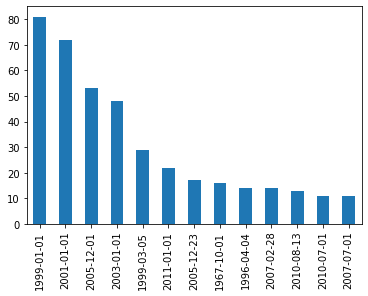

In [10]:
count_of_dates = df["GAZ_DATE"].value_counts()
count_of_dates[count_of_dates > 10].plot(kind = "bar")


In [11]:
df["GAZ_DATE"].value_counts()

1999-01-01    81
2001-01-01    72
2005-12-01    53
2003-01-01    48
1999-03-05    29
              ..
1954-12-03     1
1984-03-30     1
1988-03-18     1
2009-03-27     1
1982-01-22     1
Name: GAZ_DATE, Length: 333, dtype: int64


From 1998 to 2003, a man named Brian Gilligan was the director of NPWS, and supposedly he was always clashing with his higher-ups, with differing goals. Brian's stance was to pool more resources to help make all estates safer for human use, such as paths or stairs where needed on a trail. However, the State Government refused to listen to him as they believed the resources could be better used elsewhere. Thus, this clash could have been the cause of creation of 81 parks on the same date - mismanagement

<AxesSubplot:>

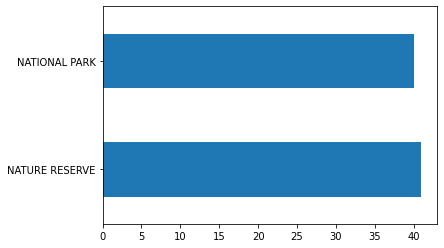

In [20]:
date = df["GAZ_DATE"]
list_of_parks_in_1999 = []
count = 0
for x in date:
    count += 1
    #print(str(x) + ": " + str(count))
    if str(x) == "1999-01-01":
        list_of_parks_in_1999.append(count-1)
rows = df.iloc[list_of_parks_in_1999]
rows["TYPE"].value_counts().plot(kind = "barh")

However, the data above shows us that it only National Parks and Nature Reserves. Another explanation could be the changing of the Director of National Parks, to Peter Cochrane, who served from 1999 to 2013.

<AxesSubplot:>

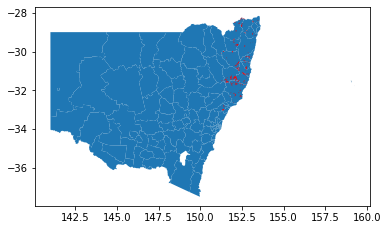

In [14]:

fig, ax = plt.subplots(1,1)
lga.plot(ax = ax)
parks_made_in_1999_geo = parks["GAZ_DATE"].astype(str) == "1999-01-01"
parks[parks_made_in_1999_geo].plot(ax = ax, color = "red")


# Moral of the story?
## Care about National Parks!